<h1 align="center"> House Price Dataset   </h1> 

#Dataset despcription

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Names and descriptions of the columns in the provided King County dataset:



**bedrooms** - Number of bedrooms 

**bathrooms** - Number of bathrooms 

**sqft_living** - Square footage of the home 

**sqft_lot** - Square footage of the lot 

**floors** - Total floors (levels) in house 

**waterfront** - Whether house has a view to a waterfront 

**view** - Number of times house has been viewed 

**condition** - How good the condition is (overall) 

**grade** - Overall grade given to the housing unit, based on King County grading system 

**sqft_above** - Square footage of house (apart from basement) 

**sqft_basement** - Square footage of the basement 

**yr_built** - Year when house was built 

**yr_renovated** - Year when house was renovated 

**zipcode** - Zip code in which house is located 

**lat** - Latitude coordinate 

**long**- Longitude coordinate 

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 
 
**price** - Price is prediction target 


# Exploring the dataset

In [50]:
import numpy as np
import pandas as pd
from scipy import stats


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from ipywidgets import widgets



In [2]:
#put your path here
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Na GITa/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Na GITa


In [3]:
df = pd.read_csv("data/houses.csv")
df.sample(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
463,4.0,2.25,2390.0,11250.0,2.0,0.0,0.0,3.0,9.0,2390.0,0.0,1988.0,0.0,98023.0,47.3305,-122.371,2480.0,35.950
644,3.0,2.50,2360.0,6699.0,2.0,0.0,0.0,3.0,7.0,2360.0,0.0,2003.0,0.0,98065.0,47.5317,-121.853,2360.0,43.000
228,3.0,1.00,1430.0,15246.0,1.0,0.0,0.0,4.0,7.0,980.0,450.0,1961.0,0.0,98031.0,47.4075,-122.214,1960.0,23.500
626,3.0,2.50,1660.0,1458.0,3.0,0.0,0.0,3.0,9.0,1660.0,0.0,2014.0,0.0,98144.0,47.5876,-122.309,1660.0,55.995
73,4.0,2.50,2380.0,5000.0,2.0,0.0,0.0,3.0,8.0,2380.0,0.0,2005.0,0.0,98038.0,47.3608,-122.036,2420.0,36.000
781,3.0,1.75,1590.0,8219.0,1.5,0.0,0.0,5.0,6.0,970.0,620.0,1938.0,0.0,98034.0,47.7146,-122.217,2030.0,40.000
562,3.0,2.50,2870.0,5163.0,2.0,0.0,0.0,3.0,9.0,2870.0,0.0,2014.0,0.0,98103.0,47.6935,-122.352,1630.0,88.000
171,3.0,1.75,2160.0,7140.0,1.0,0.0,0.0,4.0,7.0,1670.0,490.0,1978.0,0.0,98023.0,47.3026,-122.374,1930.0,27.200
613,3.0,2.75,2540.0,4694.0,2.0,0.0,0.0,3.0,9.0,2540.0,0.0,2005.0,0.0,98074.0,47.6214,-122.024,2600.0,69.500
712,4.0,2.50,2210.0,9875.0,2.0,0.0,0.0,3.0,9.0,2210.0,0.0,1990.0,0.0,98074.0,47.6285,-122.025,2440.0,63.900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       999 non-null    float64
 1   bathrooms      999 non-null    float64
 2   sqft_living    999 non-null    float64
 3   sqft_lot       999 non-null    float64
 4   floors         999 non-null    float64
 5   waterfront     999 non-null    float64
 6   view           999 non-null    float64
 7   condition      999 non-null    float64
 8   grade          999 non-null    float64
 9   sqft_above     999 non-null    float64
 10  sqft_basement  999 non-null    float64
 11  yr_built       999 non-null    float64
 12  yr_renovated   999 non-null    float64
 13  zipcode        999 non-null    float64
 14  lat            999 non-null    float64
 15  long           999 non-null    float64
 16  sqft_living15  999 non-null    float64
 17  price          999 non-null    float64
dtypes: float6

In [5]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,3.349349,2.045796,2051.397397,14707.242242,1.446947,0.008008,0.237237,3.464464,7.605606,1750.233233,301.164164,1969.030030,81.830831,98074.441441,47.549720,-122.207406,1986.813814,52.071452
std,0.852367,0.721983,888.351113,28975.077254,0.517420,0.089173,0.765472,0.689521,1.160734,790.466905,451.023402,28.198607,395.767918,52.545832,0.141558,0.139564,670.723475,33.974907
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.490000,830.000000,8.000000
25%,3.000000,1.500000,1405.000000,5419.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.443000,-122.322500,1490.000000,30.980000
50%,3.000000,2.000000,1900.000000,8040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98058.000000,47.563600,-122.218000,1850.000000,43.500000
75%,4.000000,2.500000,2475.000000,11508.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2135.000000,580.000000,1992.000000,0.000000,98116.000000,47.673400,-122.118000,2360.000000,63.446250
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.000000,6070.000000,2060.000000,2015.000000,2014.000000,98199.000000,47.777600,-121.709000,4760.000000,308.000000


In [6]:
df.isna().any()

bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
yr_renovated     True
zipcode          True
lat              True
long             True
sqft_living15    True
price            True
dtype: bool

In [11]:
df.dropna(inplace=True)


In [7]:
df.duplicated(keep='first').any()

False

#TO DO: Interactive plots

In [15]:
lower_tri = df.corr().where(np.tril(np.ones(df.corr().shape),k=0).astype(bool))

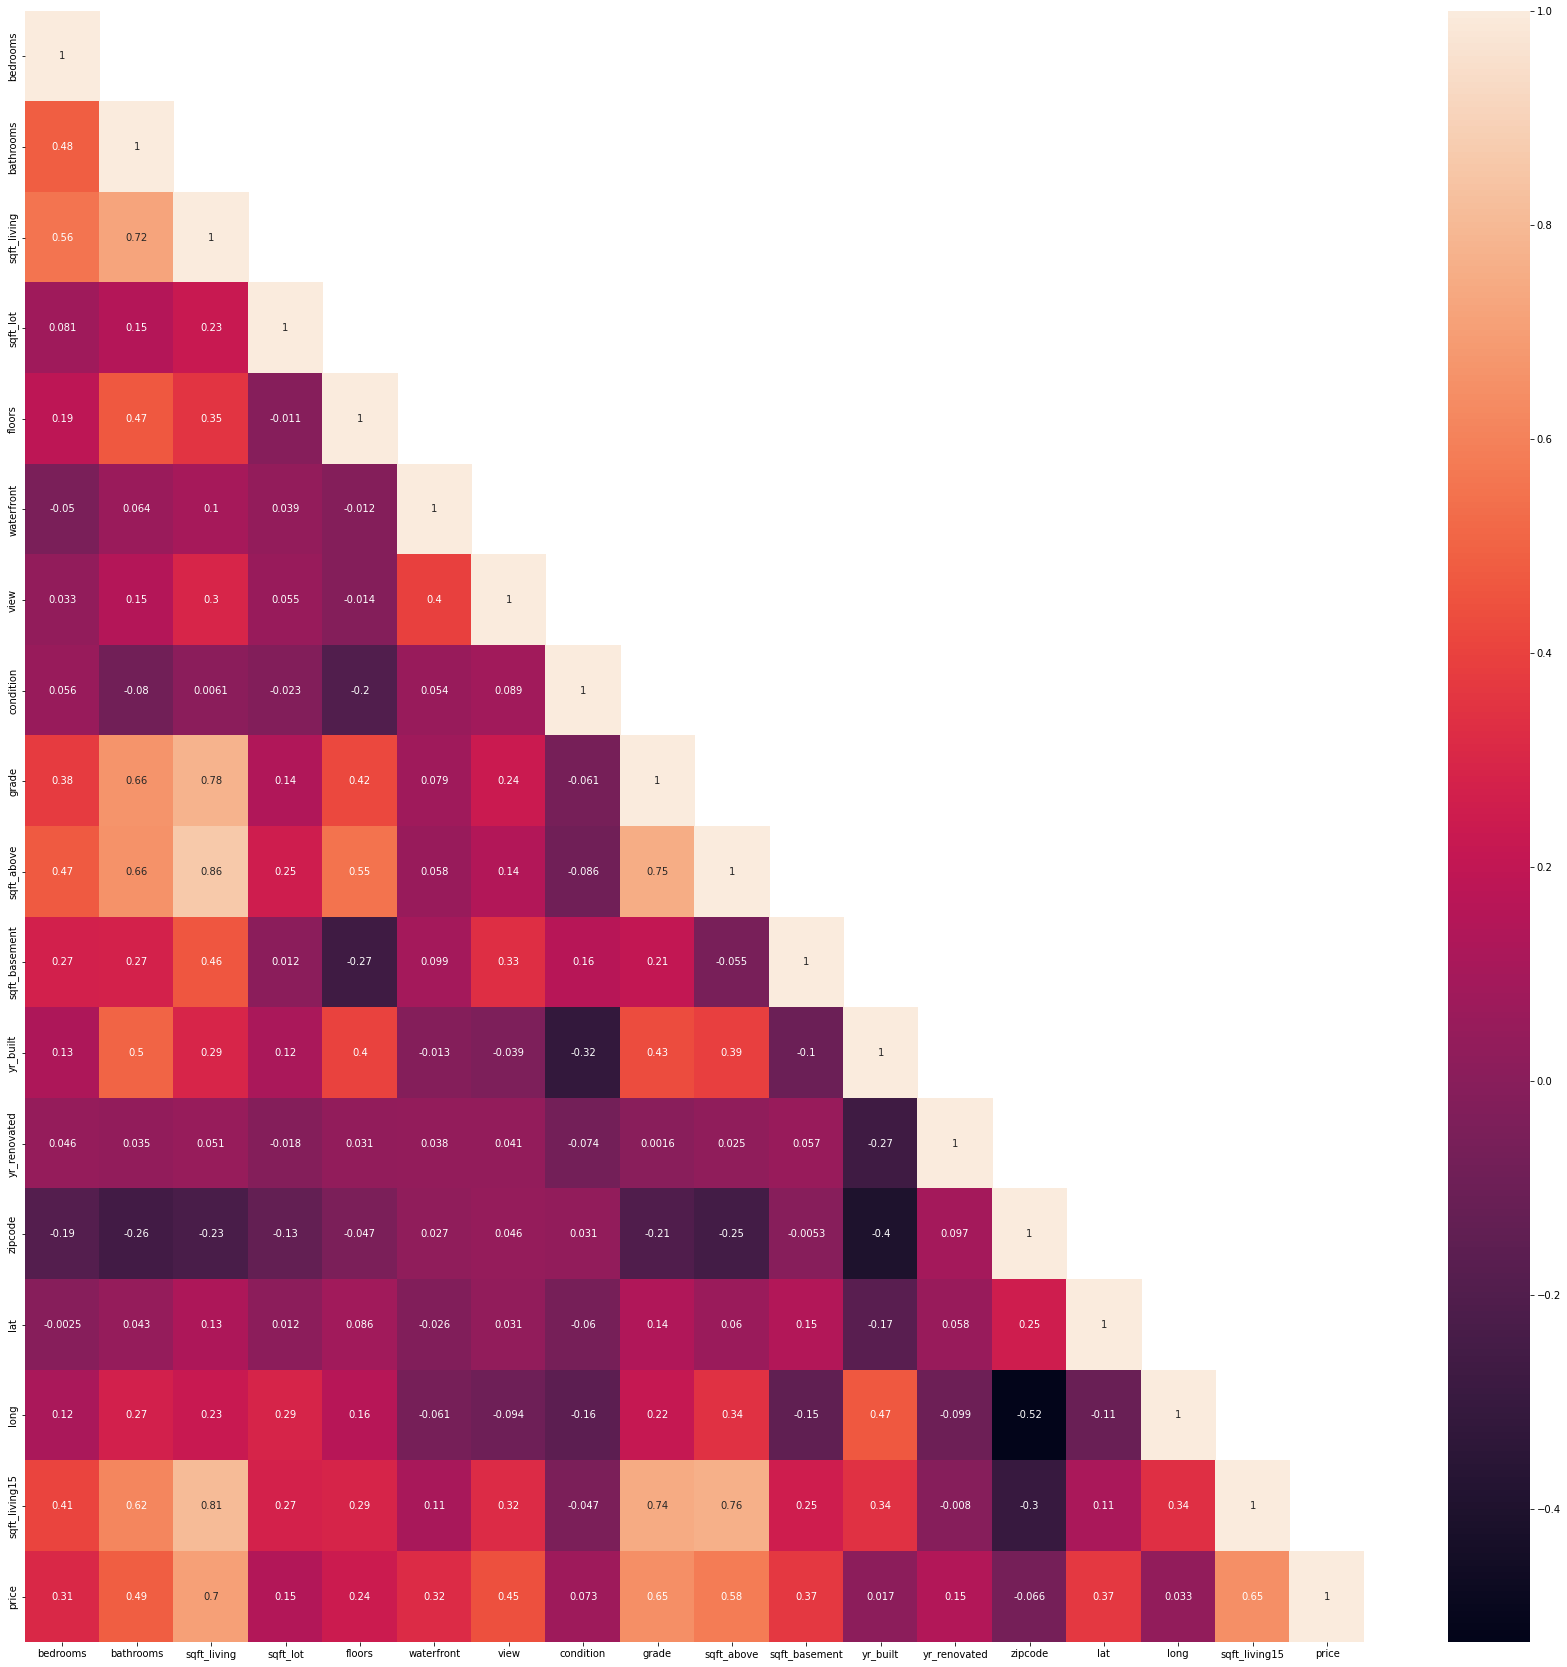

In [16]:
plt.figure(figsize=(30, 30))
sns.heatmap(lower_tri, annot=True)
plt.show()

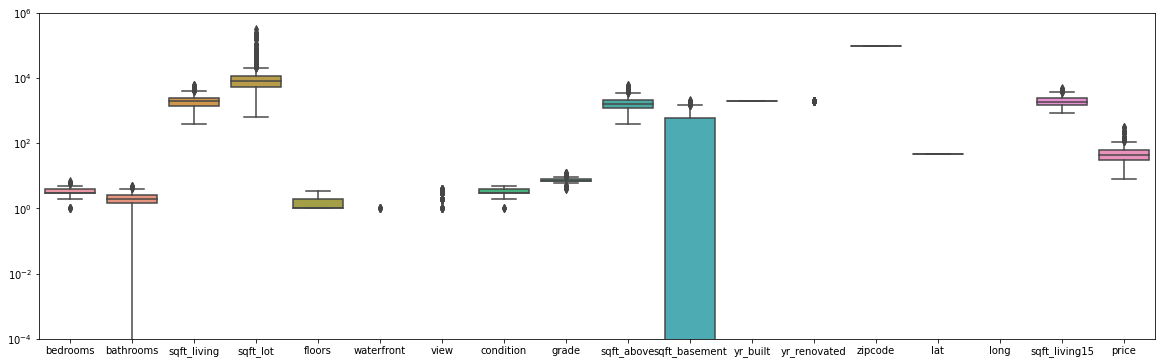

In [23]:
feats = list(df.columns)[0:-1]
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(data=df)
fig.set_yscale("log")
fig.axis(ymin=0.0001, ymax=10**6);

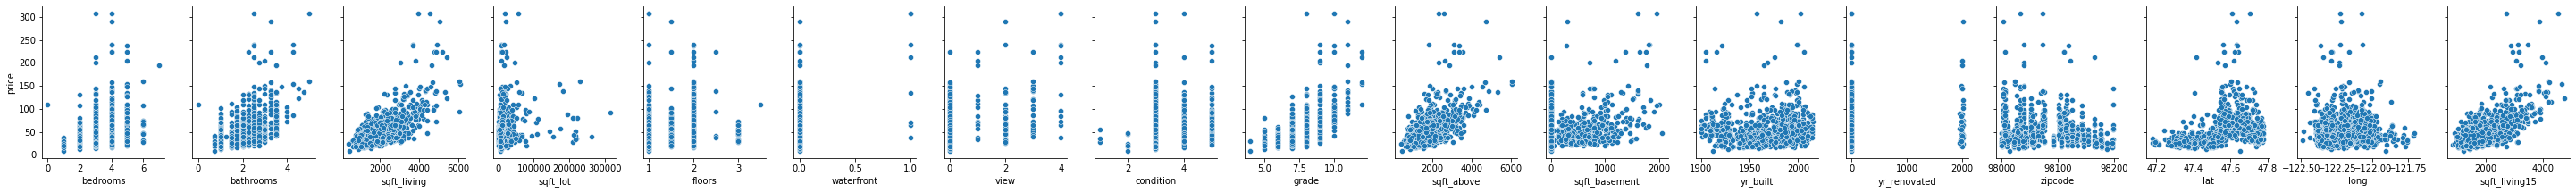

In [47]:
ax =sns.pairplot(data=df, x_vars=feats, y_vars=['price'], height = 3, aspect =0.8 )

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

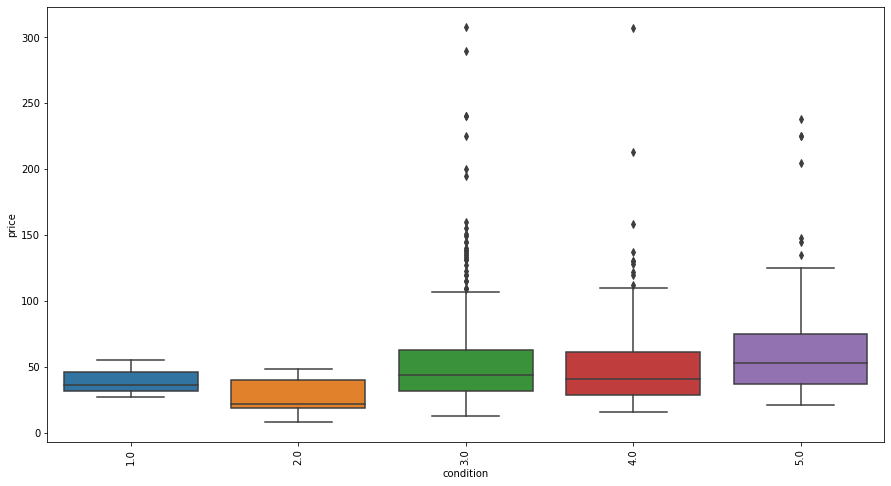

In [30]:
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text major ticklabel objects>)

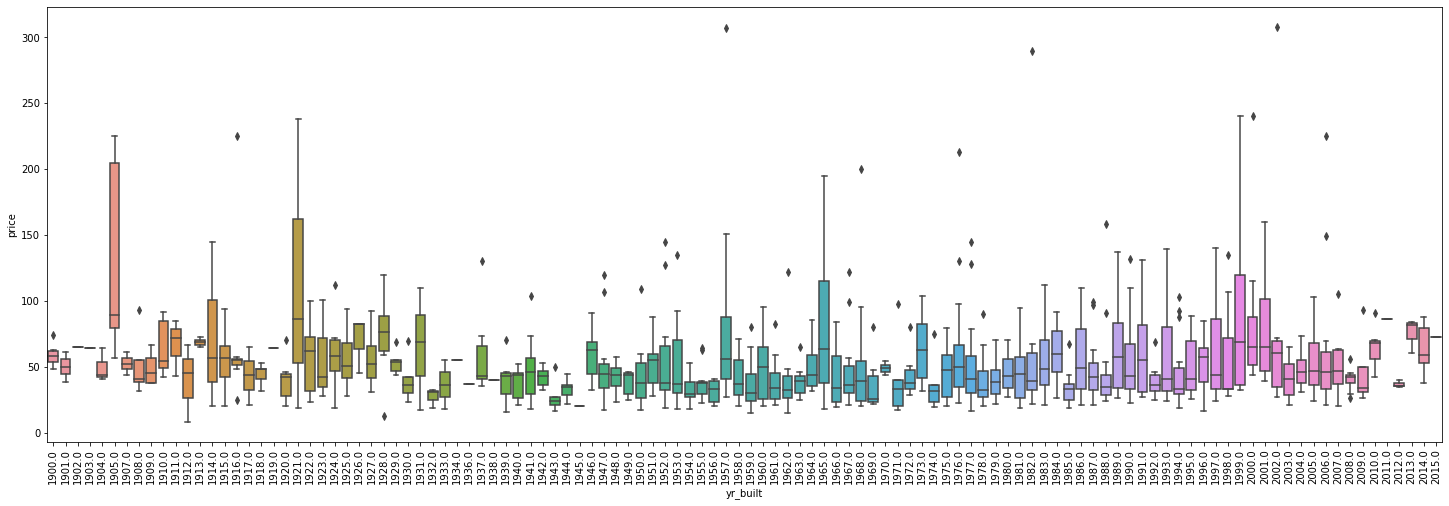

In [28]:
var = 'yr_built'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

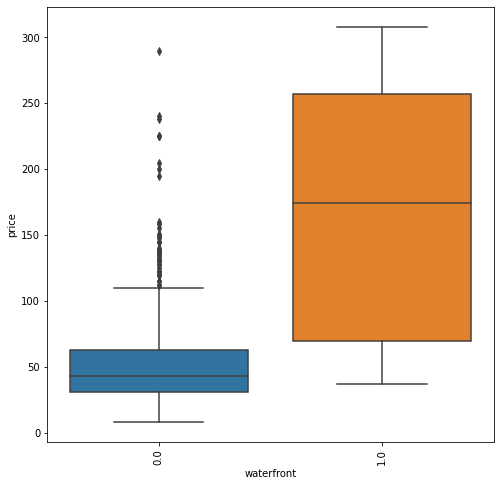

In [32]:
var = 'waterfront'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="price", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


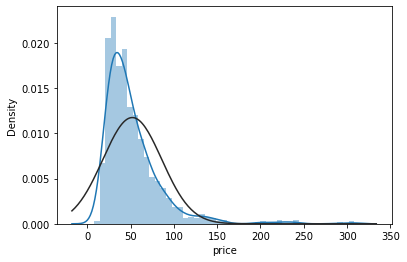

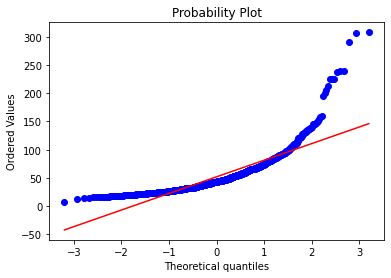

In [51]:
sns.distplot(df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [53]:
df['price'] = np.log(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


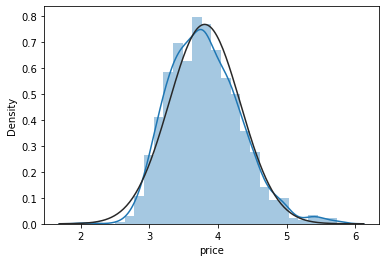

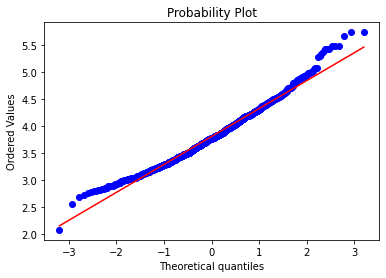

In [54]:
sns.distplot(df['price'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [ ]:
#X_train , X_test , y_train , y_test = train_test_split(X_ros, y_ros, test_size = 0.25 , random_state = 33)

#TO DO: Elastic Net Regression

#TO DO: AdaBoost

#TO DO: XGBoost

In [ ]:
# %pip install dtreeviz[xgboost] 
# from dtreeviz.trees import dtreeviz # remember to load the package

#trees.dtreeviz(xgb_model, X_, d[target], features, target, tree_index=1)
# dtreeviz(clf_xgb, X_train, y_train,  list(X_train.columns), "Target",  
#           class_names=['Sudden Acceleration', 'Sudden Right Turn', 'Sudden Left Turn', 'Sudden Break'], 
#           tree_index=0, orientation = 'LR', scale = 2)
